# D206 Performance Assessment
**Student:** Chris Fischer 
**ID:** 011933891
**Dataset:** Churn
---

## Initialization
---

### Import libraries

In [1]:
#import needed libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Set Pandas options

In [2]:
#allow pd.describe to show all columns of the data frame [In-Text Citation: (Ray, 2020)]
pd.options.display.max_columns = None 

### Initialize some static arrays

In [3]:
numerical_variables = ['Age','Income','Children','Tenure','Bandwidth_GB_Year','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','MonthlyCharge']
categorical_variables = ['Education','Employment','Marital','Gender','InternetService','PaymentMethod']
yes_no_variables = ['Churn','Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
survey_variables = ['item1','item2','item3','item4','item5','item6','item7','item8']
survey_answers = [1,2,3,4,5,6,7,8]

### Load raw data from CSV

In [4]:
#load church_missing_data.csv
raw_data = pd.read_csv('churn_raw_data.csv')

In [5]:
#Examine the data frame [In-Text Citation: (Patanam, 2015)]
raw_data.info()
raw_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.00000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000,7505.000000,7525.000000,10000,10000,7510.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,7523,10000,10000,10000,7871,8974,10000,10000,10000,10000,9009,10000,10000,10000,10000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,10000,10000,6058,52,1620,NaN,NaN,NaN,NaN,3,25,639,NaN,NaN,12,5,NaN,5,3,2,NaN,NaN,NaN,NaN,2,3,2,2,2,2,2,2,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Houston,TX,Washington,NaN,NaN,NaN,NaN,Suburban,America/New_York,Occupational psychologist,NaN,NaN,Regular High School Diploma,Full Time,NaN,Divorced,Female,No,NaN,NaN,NaN,NaN,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes,Electronic Check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,1,34,603,111,NaN,NaN,NaN,NaN,3346,4072,30,NaN,NaN,2421,5992,NaN,2092,5025,7350,NaN,NaN,NaN,NaN,6266,5456,5166,7009,4408,8128,5392,6424,5494,5614,5635,5071,5110,5882,3398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,5000.50000,NaN,NaN,NaN,NaN,NaN,49153.319600,38.757567,-90.782536,9756.562400,NaN,NaN,NaN,2.095936,53.275748,NaN,NaN,39936.762226,NaN,NaN,NaN,11.452955,12.016000,0.994200,0.398000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,NaN,NaN,NaN,NaN,NaN,27532.196108,5.437389,15.156142,14432.698671,NaN,NaN,NaN,2.154758,20.753928,NaN,NaN,28358.469482,NaN,NaN,NaN,7.025921,3.025898,0.988466,0.635953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,601.000000,17.966120,-171.688150,0.000000,NaN,NaN,NaN,0.000000,18.000000,NaN,NaN,740.660000,NaN,NaN,NaN,-1.348571,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,NaN,NaN,NaN,NaN,NaN,26292.500000,35.341828,-97.082812,738.000000,NaN,NaN,NaN,0.000000,35.000000,NaN,NaN,19285.522500,NaN,NaN,NaN,8.054362,10.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,NaN,NaN,NaN,NaN,NaN,48869.500000,39.395800,-87.918800,2910.500000,NaN,NaN,NaN,1.000000,53.000000,NaN,NaN,33186.785000,NaN,NaN,NaN,10.202896,12.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,7500.25000,NaN,NaN,NaN,NaN,NaN,71866.500000,42.106908,-80.088745,13168.000000,NaN,NaN,NaN,3.000000,71.000000,NaN,NaN,53472.395000,NaN,NaN,NaN,12.487644,14.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


## Detection (C4)
---

### Detect any duplicate variable names

In [6]:
#Find the number of duplicated variable names
#Formatting code [In-Text Citation:(Sanchhaya Education, Pvt Ltd, 2023)]
print('Number of duplicated variables : {}'.format(raw_data.columns.duplicated().sum()))

Number of duplicated variables : 0


### Detect duplicate rows and ID values

In [7]:
#Count duplicated rows [In-Text Citiation: (Zach, 2022)]
#Formatting code [In-Text Citation:(Sanchhaya Education, Pvt Ltd, 2023)]
print('Duplicate rows : {}'.format(len(raw_data)-len(raw_data.drop_duplicates())))

Duplicate rows : 0


In [8]:
#Count duplicate Customer_id and Interaction values [In-Text Citiation: (Zach, 2022)]
#Formatting code [In-Text Citation:(Sanchhaya Education, Pvt Ltd, 2023)]
print('Duplicate Customer_ids : {}'.format(len(raw_data['Customer_id'])-len(raw_data['Customer_id'].drop_duplicates()))) 
print('Duplicate Interactions : {}'.format(len(raw_data['Interaction'])-len(raw_data['Interaction'].drop_duplicates())))

Duplicate Customer_ids : 0
Duplicate Interactions : 0


### Detect and evaluate missing data

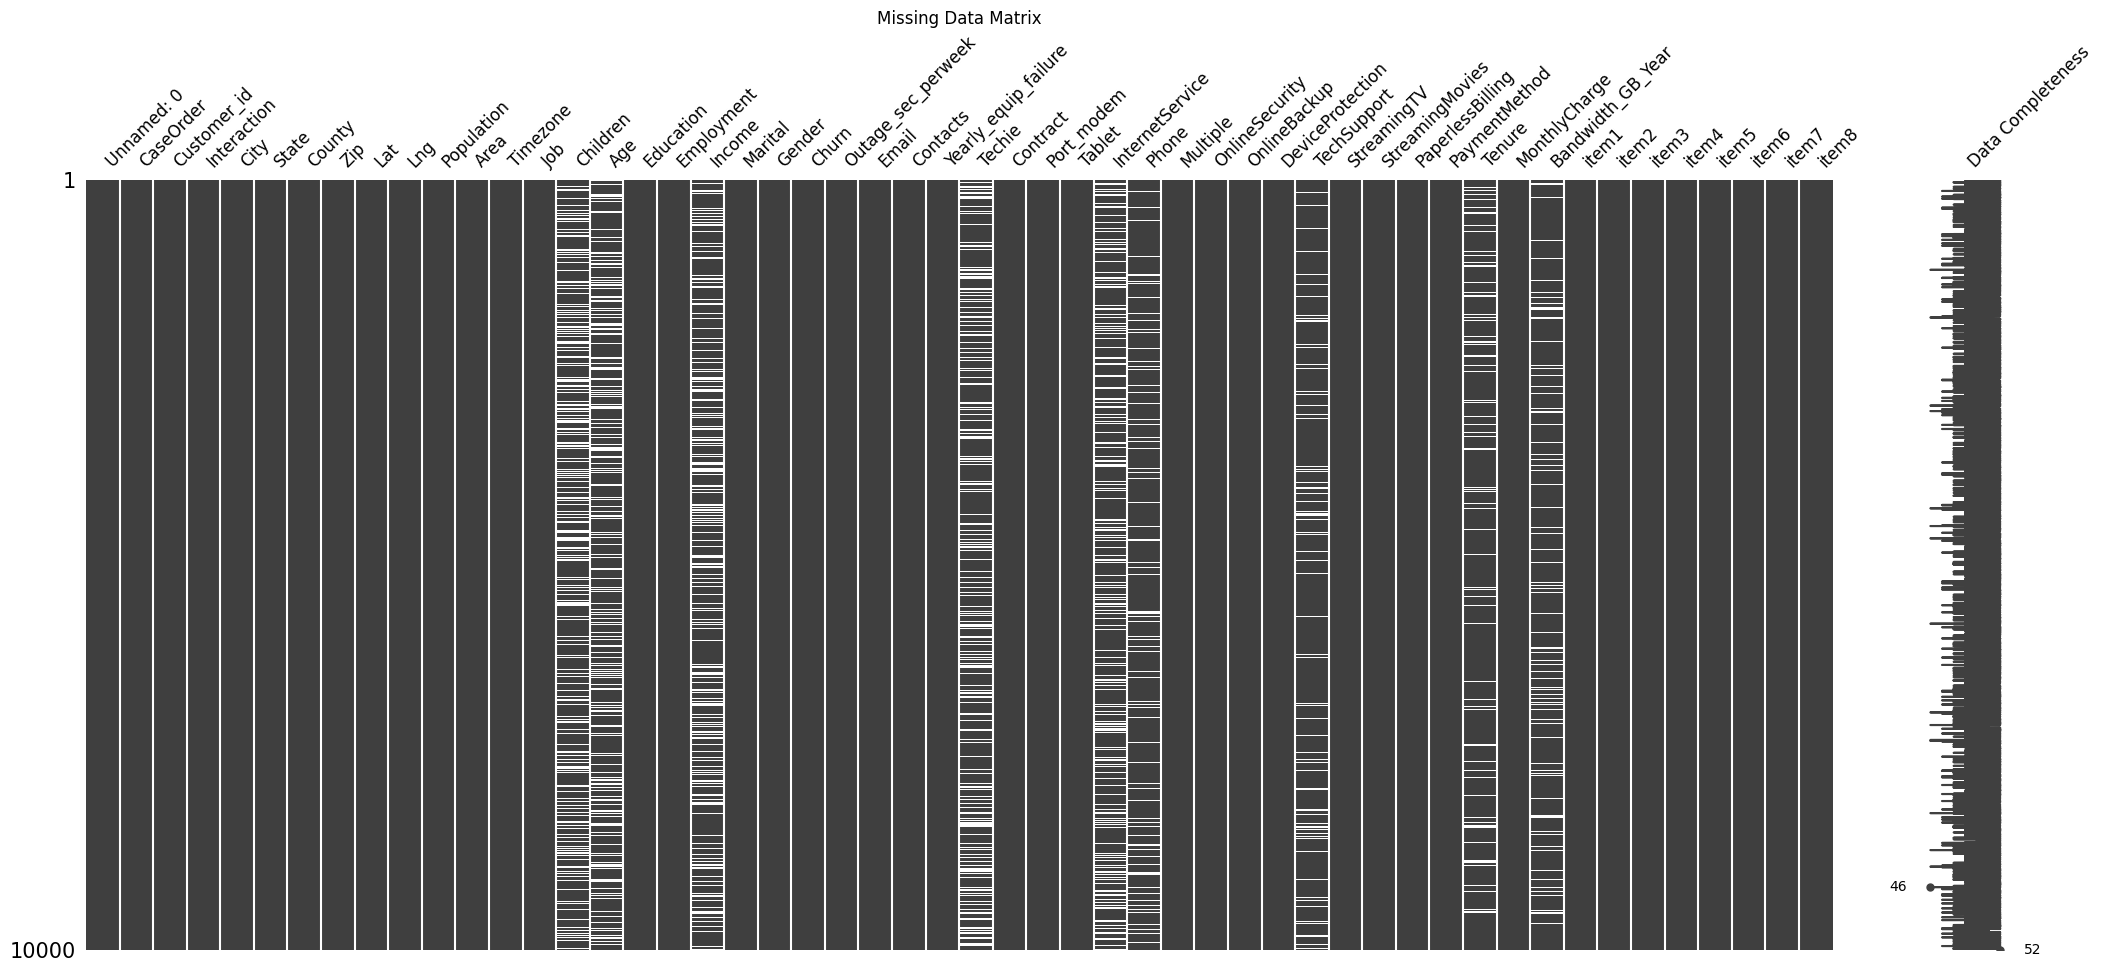

In [9]:
#Print the missing data matrix [In-Text Citation:(Middleton, Getting Started with Detecting and Treating Missing Values, 2023)]
msno.matrix(raw_data, fontsize = 12, labels=True)
plt.title('Missing Data Matrix')
plt.show()

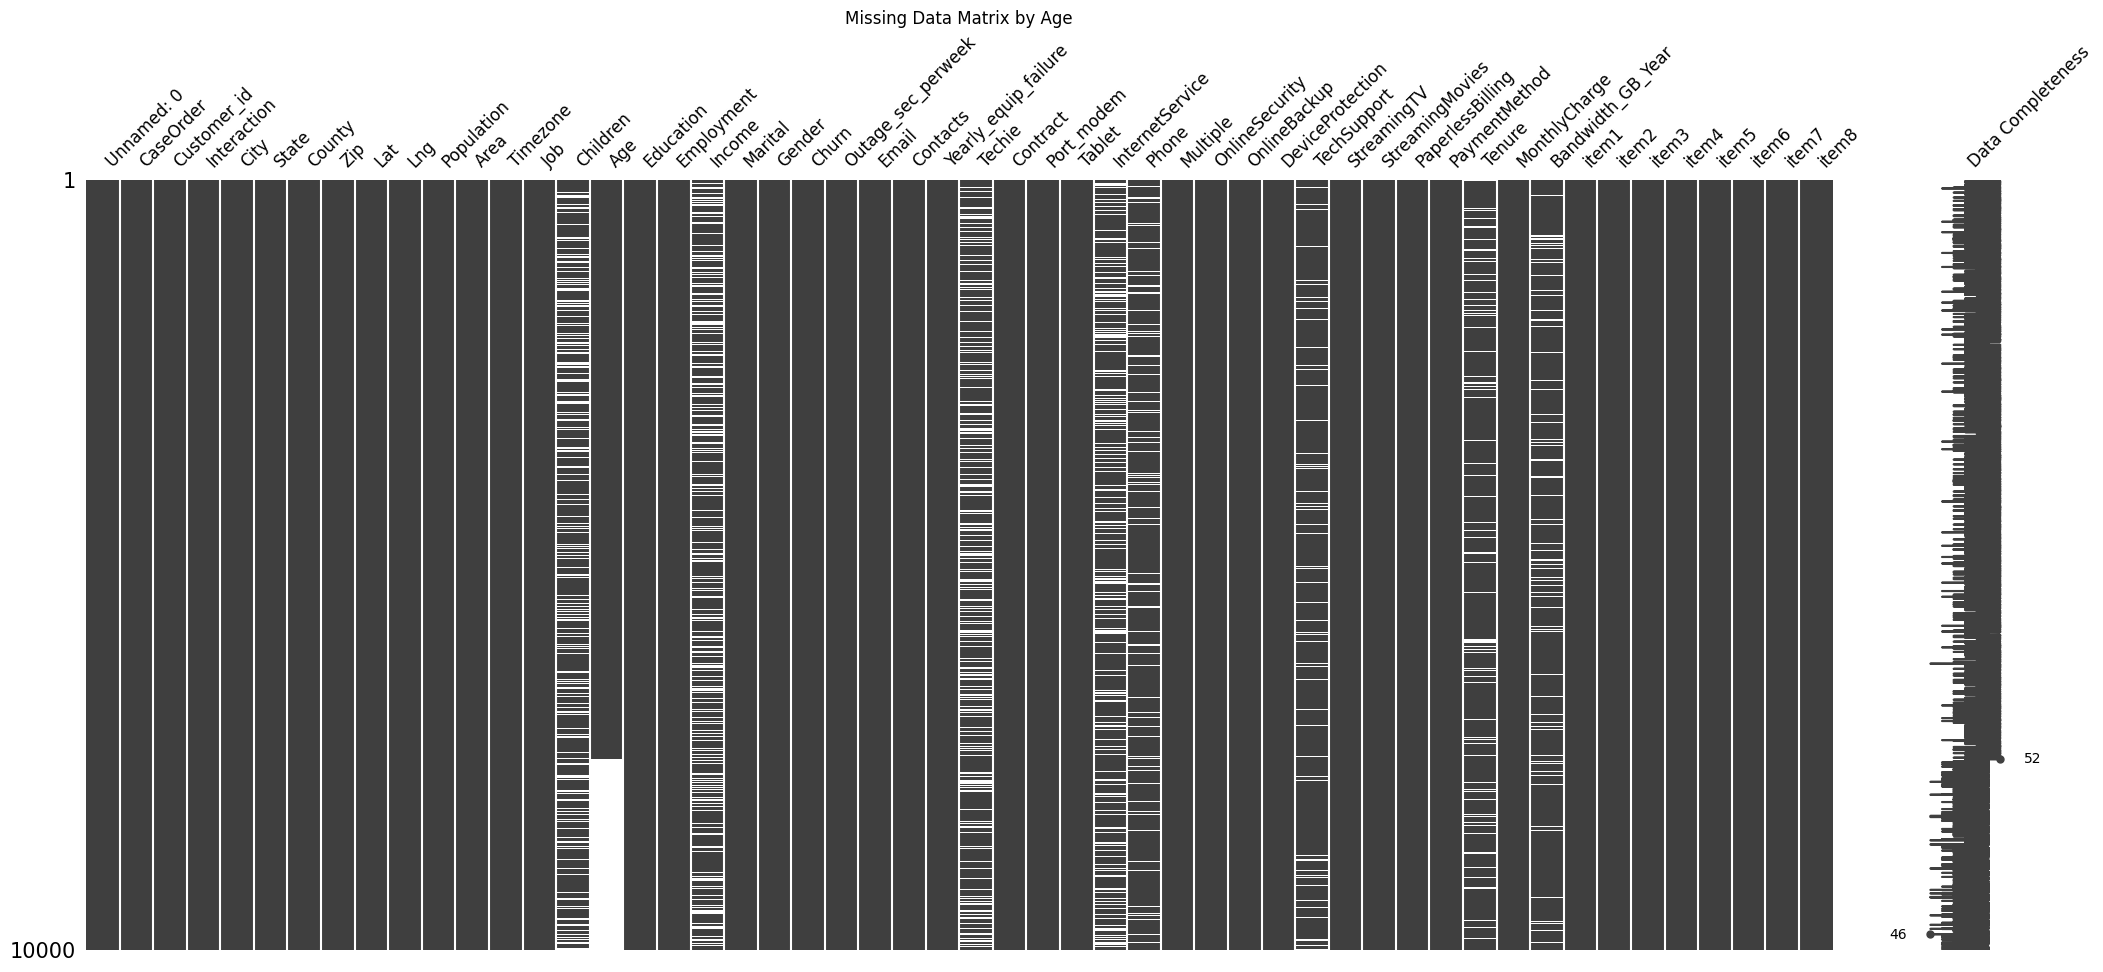

In [10]:
#Sort the data by Age to see if there is a correlation of missingness
#between Age, Children, Income [In-Text Citation:(Middleton, Getting Started with Detecting and Treating Missing Values, 2023)]
msno.matrix(raw_data.sort_values(by='Age'), fontsize = 12, labels=True)
plt.title('Missing Data Matrix by Age')
plt.show()

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

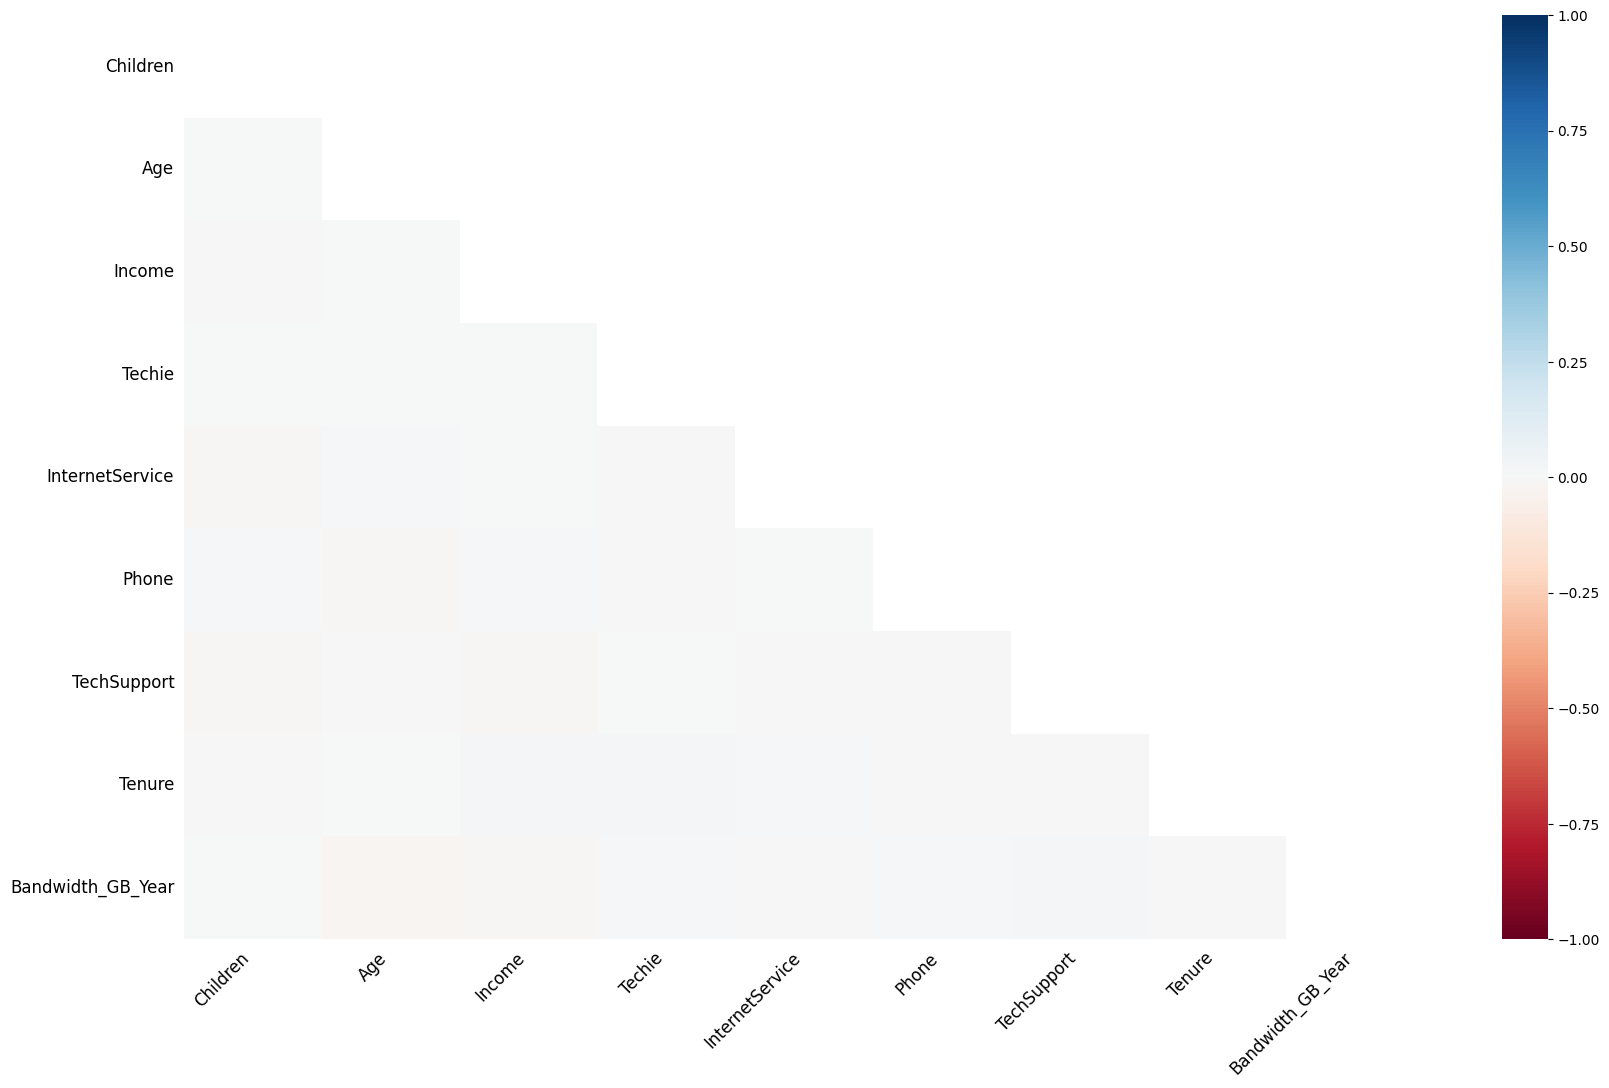

In [11]:
# Display a heatmap to show any correlation between missing columns
msno.heatmap(raw_data, fontsize = 12, labels=True)
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
#List any features with missing values [In-Text Citation: (Uzunov, 2016)]
missing_data = raw_data[raw_data.columns[raw_data.isnull().any()]].copy()
print(len(missing_data.columns))    # How many variables have missing data?
print(missing_data.isnull().sum())  # How many missing values in each variable?

9
Children             2495
Age                  2475
Income               2490
Techie               2477
InternetService      2129
Phone                1026
TechSupport           991
Tenure                931
Bandwidth_GB_Year    1021
dtype: int64


### Detect value errors in survey questions

In [ ]:
#Check values in survey questions [In-Text Citation: (Guar, 2019)]
print(raw_data[survey_variables][~raw_data[survey_variables].isin(survey_answers)].count()) 

item1    0
item2    0
item3    0
item4    0
item5    0
item6    0
item7    0
item8    0
dtype: int64


### Detect value errors in yes/no variables

In [ ]:
#Check values in yes/no variables [In-Text Citation: (Guar, 2019)]
print(raw_data[yes_no_variables][~raw_data[yes_no_variables].isin(['Yes','No'])].count())

Churn               0
Techie              0
Port_modem          0
Tablet              0
Phone               0
Multiple            0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
dtype: int64


### Detect possible outliers

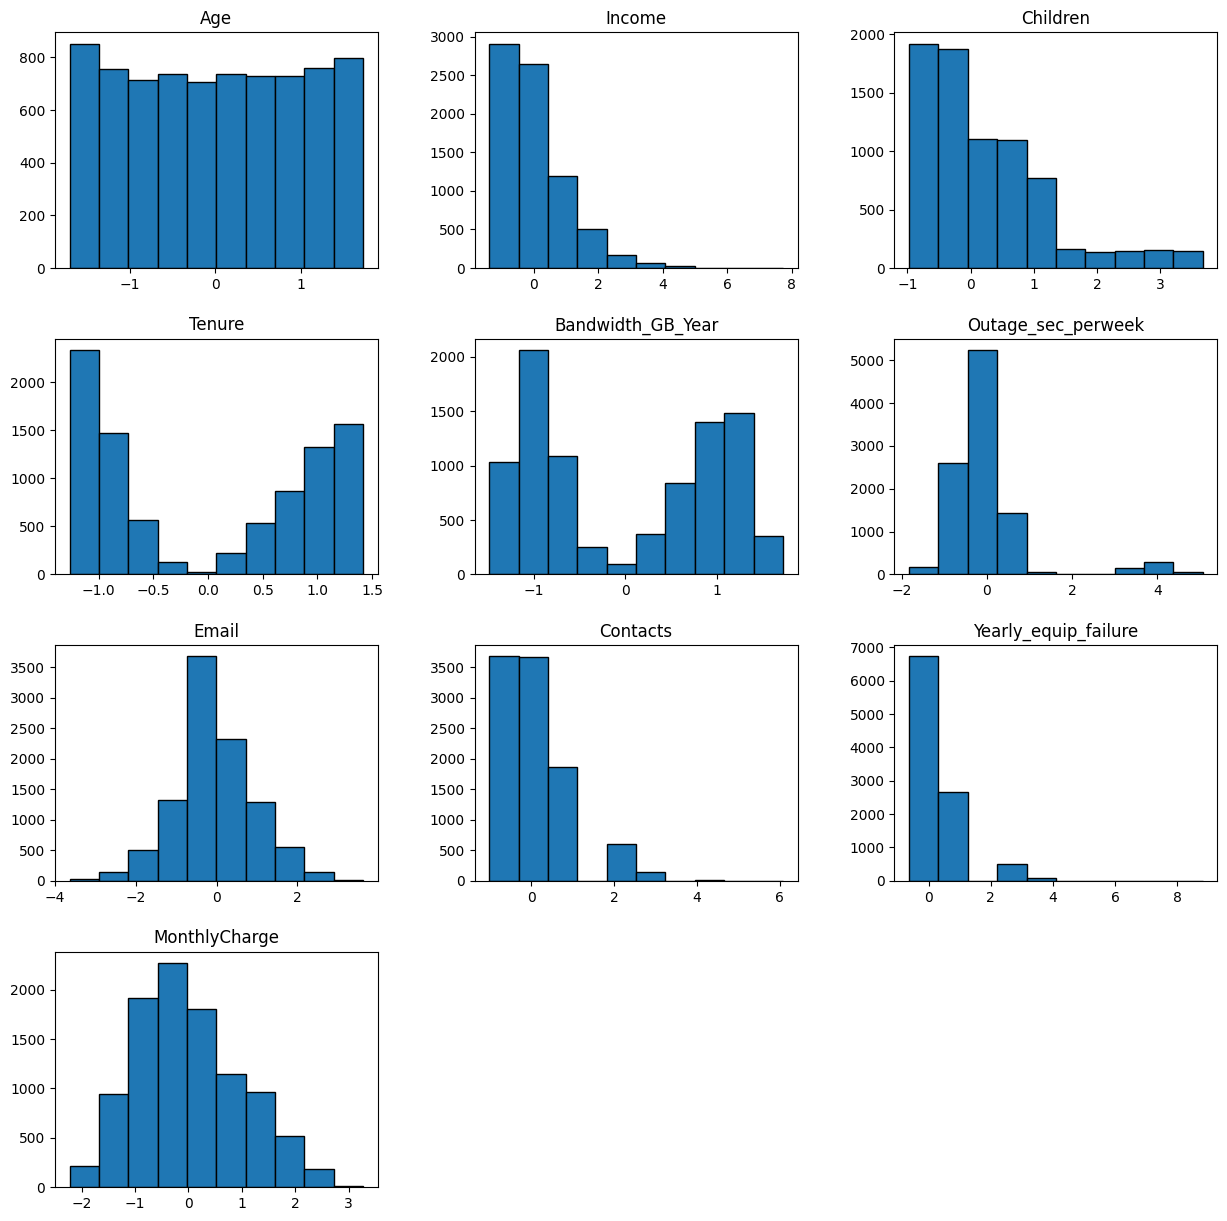

In [ ]:
#Compute zscore for all numerical variables (other than demographics) [In-Text Citation:(Bathelt, 2017)]
raw_data_z = (raw_data[numerical_variables] - raw_data[numerical_variables].mean())/raw_data[numerical_variables].std(ddof=0) 
raw_data_z.hist(edgecolor='black', grid=False, figsize=(15,15))
plt.show()

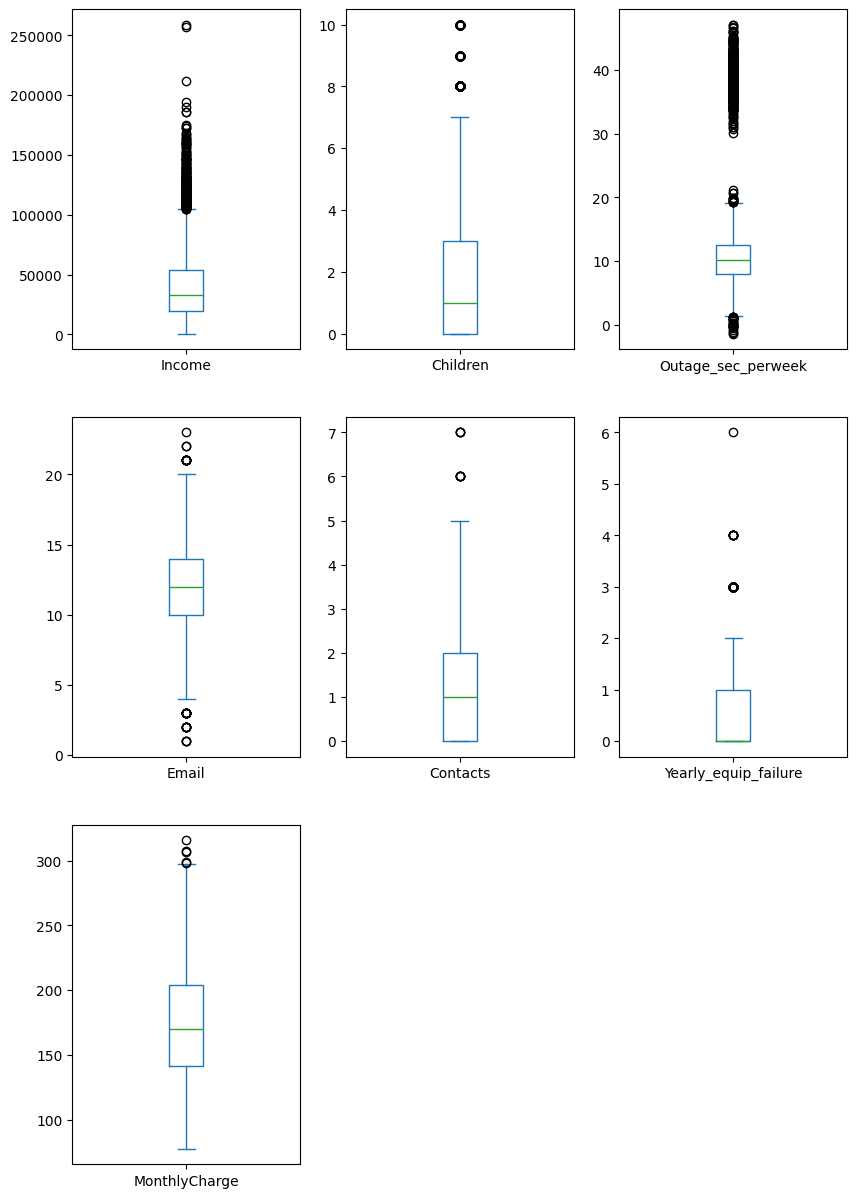

In [ ]:
#Examine boxplots of variables with any values with zscore > 3 [In-Text Citation:(Varun, 2023)]
outlier_cols = raw_data_z.loc[: , (raw_data_z > 3.0).any()].columns
raw_data[outlier_cols].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10, 15))
plt.show()

In [ ]:
#Count, min, max of outliers
#Formatting code [In-Text Citation:(Sanchhaya Education, Pvt Ltd, 2023)]
for col in outlier_cols :
    cnt = len(raw_data_z[raw_data_z[col]>3])
    min, max = raw_data[col].min(), raw_data[col].max()
    print('Likely outlier for {0:<20}\t Count: {1:7d} ({2:5.2%} of observations)\tMin: {3:>9.2f}\tMax: {4:>9.2f}'.format(col,cnt,cnt/10000,min,max))

Likely outlier for Income              	 Count:     110 (1.10% of observations)	Min:    740.66	Max: 258900.70
Likely outlier for Children            	 Count:     144 (1.44% of observations)	Min:      0.00	Max:     10.00
Likely outlier for Outage_sec_perweek  	 Count:     491 (4.91% of observations)	Min:     -1.35	Max:     47.05
Likely outlier for Email               	 Count:       3 (0.03% of observations)	Min:      1.00	Max:     23.00
Likely outlier for Contacts            	 Count:     165 (1.65% of observations)	Min:      0.00	Max:      7.00
Likely outlier for Yearly_equip_failure	 Count:      94 (0.94% of observations)	Min:      0.00	Max:      6.00
Likely outlier for MonthlyCharge       	 Count:       3 (0.03% of observations)	Min:     77.51	Max:    315.88


### Evaluate categorical variables for re-expression

In [ ]:
#Evaluate categorical variables for re-expression
for column in categorical_variables:
    print(raw_data[column].value_counts())

Education
Regular High School Diploma                 2421
Bachelor's Degree                           1703
Some College, 1 or More Years, No Degree    1562
9th Grade to 12th Grade, No Diploma          870
Master's Degree                              764
Associate's Degree                           760
Some College, Less than 1 Year               652
Nursery School to 8th Grade                  449
GED or Alternative Credential                387
Professional School Degree                   198
No Schooling Completed                       118
Doctorate Degree                             116
Name: count, dtype: int64
Employment
Full Time     5992
Part Time     1042
Retired       1011
Unemployed     991
Student        964
Name: count, dtype: int64
Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: count, dtype: int64
Gender
Female                  5025
Male                    4744
Prefer not to answer     231
Name: 

## Treatment (D4)
---

### Drop unneeded column

In [ ]:
#Drop column zero as it is a copy of column 1 [In-Text Citation:(Chen, 2019)]
raw_data.drop(raw_data.filter(regex="Unnamed"),axis=1, inplace=True)

### Rename vague variables

In [ ]:
#Copy the survey response variables and rename for better clarity; leave the original columns intact
raw_data[['Survey_TimelyResponses', \
          'Survey_TimelyFixes', \
          'Survey_TimelyReplacements', \
          'Survey_Reliability', \
          'Survey_Options', \
          'Survey_Respectful', \
          'Survey_Courteous', \
          'Survey_ActiveListening']] = \
		  raw_data[['item1', \
                    'item2', \
                    'item3', \
                    'item4', \
                    'item5', \
                    'item6', \
                    'item7', \
                    'item8']]


### Treat missing data

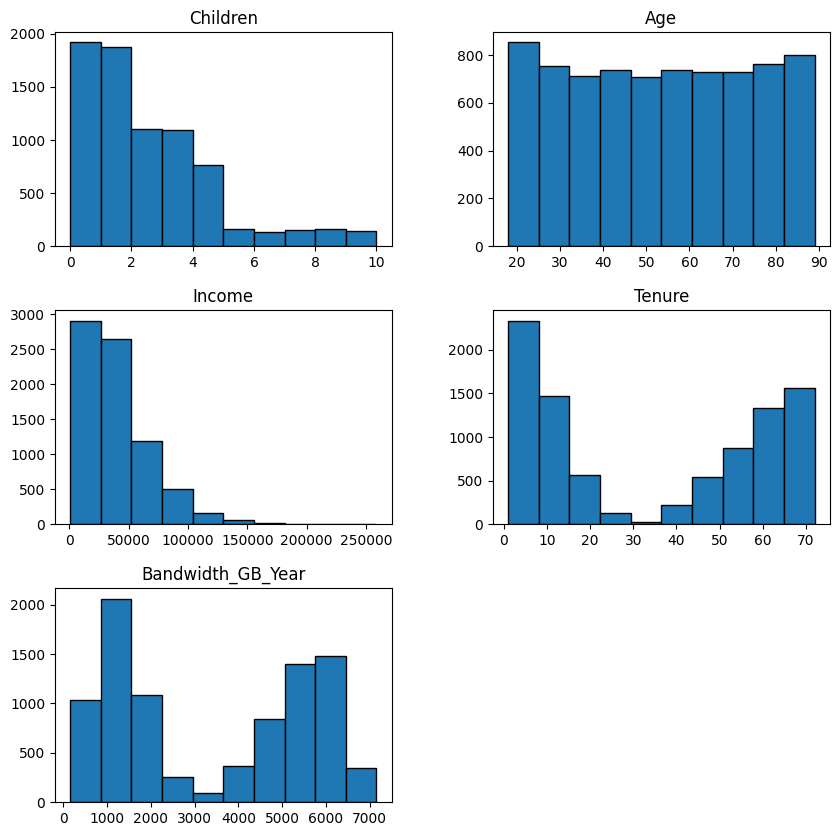

In [ ]:
#Plot a histogram of all numeric columns with missing values
missing_data.hist(edgecolor='black', grid=False, figsize=(10,10))
plt.show()

In [ ]:
#Create a copy of untreated data for later comparison
missing_data_treated = missing_data.copy()

In [ ]:
#Treat the missing values
missing_data_treated['Age']                 = missing_data['Age'].fillna(missing_data['Age'].mean().round())
missing_data_treated['Income']              = missing_data['Income'].fillna(missing_data['Income'].median())
missing_data_treated['Children']            = missing_data['Children'].fillna(missing_data['Children'].median())
missing_data_treated['Tenure']              = missing_data['Tenure'].fillna(missing_data['Tenure'].median())
missing_data_treated['Bandwidth_GB_Year']   = missing_data['Bandwidth_GB_Year'].fillna(missing_data['Bandwidth_GB_Year'].median())
missing_data_treated['Phone']               = missing_data['Phone'].fillna(missing_data['Phone'].mode()[0])
missing_data_treated['TechSupport']         = missing_data['TechSupport'].fillna(missing_data['TechSupport'].mode()[0])
missing_data_treated['Techie']              = missing_data['Techie'].fillna(missing_data['Techie'].mode()[0])
missing_data_treated['InternetService']     = missing_data['InternetService'].fillna(missing_data['InternetService'].mode()[0])

In [ ]:
#Check mean and median of before and after treatment
for column in ['Age','Income','Children','Tenure','Bandwidth_GB_Year']:
    mean_before     = missing_data[column].mean()
    mean_after      = missing_data_treated[column].mean()
    mean_diff       = (mean_before - mean_after) / mean_before

    median_before   = missing_data[column].median()
    median_after    = missing_data_treated[column].median()
    median_diff     = (median_before - median_after) / median_before

    #Formatting code [In-Text Citation:(Sanchhaya Education, Pvt Ltd, 2023)]
    print('\nVariable: {}'.format(column))
    print('\tMean before:     {0:7.2f}'.format(mean_before))
    print('\tMean after:      {0:7.2f}'.format(mean_after))
    print('\tMean diff:       {0:7.2%}'.format(mean_diff))
    print('\n\tMedian before:   {0:7.2f}'.format(median_before))
    print('\tMedian after:    {0:7.2f}'.format(median_after))
    print('\tMedian diff:     {0:7.2%}'.format(median_diff))


Variable: Age
	Mean before:       53.28
	Mean after:        53.21
	Mean diff:         0.13%

	Median before:     53.00
	Median after:      53.00
	Median diff:       0.00%

Variable: Income
	Mean before:     39936.76
	Mean after:      38256.02
	Mean diff:         4.21%

	Median before:   33186.79
	Median after:    33186.79
	Median diff:       0.00%

Variable: Children
	Mean before:        2.10
	Mean after:         1.82
	Mean diff:        13.05%

	Median before:      1.00
	Median after:       1.00
	Median diff:       0.00%

Variable: Tenure
	Mean before:       34.50
	Mean after:        34.66
	Mean diff:        -0.46%

	Median before:     36.20
	Median after:      36.20
	Median diff:       0.00%

Variable: Bandwidth_GB_Year
	Mean before:     3398.84
	Mean after:      3397.17
	Mean diff:         0.05%

	Median before:   3382.42
	Median after:    3382.42
	Median diff:       0.00%


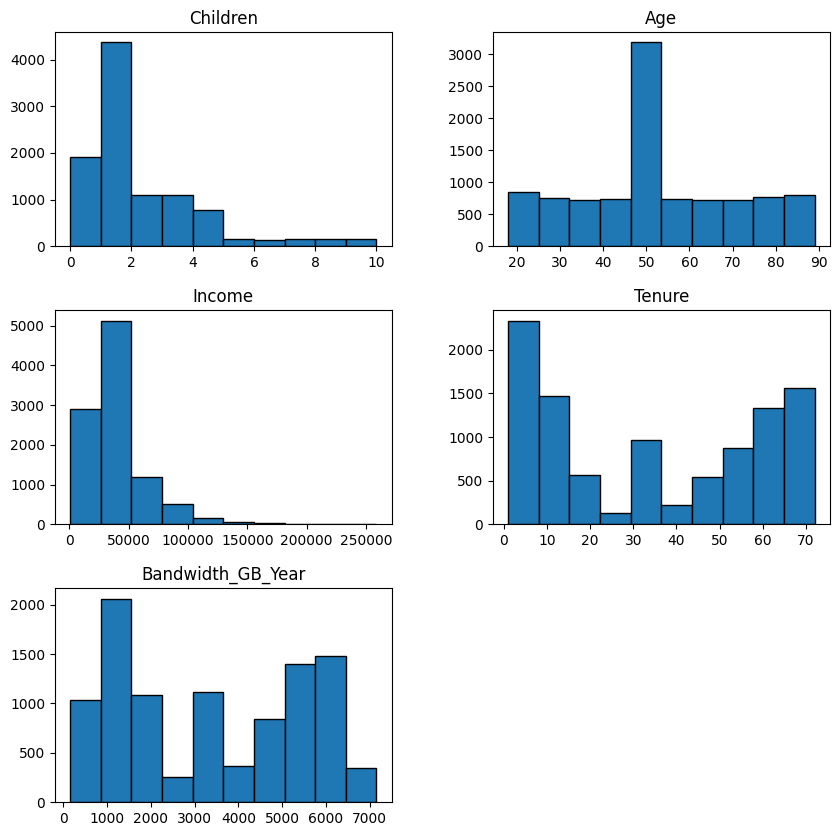

In [ ]:
#Plot a histogram of all treated columns
missing_data_treated.hist(edgecolor='black', grid=False, figsize=(10,10))
plt.show()

In [ ]:
#Replace missing value columns in original df with treated columns
for column in missing_data_treated.columns:
    raw_data[column] = missing_data_treated[column]

### Treat outliers

In [ ]:
#Replace any Outage_sec_perweek < 0 with 0
raw_data['Outage_sec_perweek'] = np.where(raw_data['Outage_sec_perweek'] < 0, 0, raw_data['Outage_sec_perweek'])

### Re-express all yes/no variables as integer

In [28]:
#Reexpress yes/no columns as numbers [In-Text Citation:(Eiler, 2017)]
yesno_dict = {'No': 0, 'Yes': 1}
yes_no_int_variables = []
for column in yes_no_variables:
    new_col = column + '_int'
    yes_no_int_variables.append(new_col)
    raw_data[new_col] = raw_data[column].map(yesno_dict)
    print(raw_data[new_col].value_counts())

Churn_int
0    7350
1    2650
Name: count, dtype: int64
Techie_int
0    8743
1    1257
Name: count, dtype: int64
Port_modem_int
0    5166
1    4834
Name: count, dtype: int64
Tablet_int
0    7009
1    2991
Name: count, dtype: int64
Phone_int
1    9154
0     846
Name: count, dtype: int64
Multiple_int
0    5392
1    4608
Name: count, dtype: int64
OnlineSecurity_int
0    6424
1    3576
Name: count, dtype: int64
OnlineBackup_int
0    5494
1    4506
Name: count, dtype: int64
DeviceProtection_int
0    5614
1    4386
Name: count, dtype: int64
TechSupport_int
0    6626
1    3374
Name: count, dtype: int64
StreamingTV_int
0    5071
1    4929
Name: count, dtype: int64
StreamingMovies_int
0    5110
1    4890
Name: count, dtype: int64
PaperlessBilling_int
1    5882
0    4118
Name: count, dtype: int64


### Re-express Education variable as integer with fewer values

In [29]:
#Re-express education into fewer numeric ordinal values [In-Text Citation:(Eiler, 2017)]
edu_dict = {"Regular High School Diploma" : 12, \
    "Bachelor's Degree" : 16, \
    "Some College, 1 or More Years, No Degree" : 13, \
    "9th Grade to 12th Grade, No Diploma" : 9, \
    "Master's Degree" : 18, \
    "Associate's Degree" : 14, \
    "Some College, Less than 1 Year" : 13, \
    "Nursery School to 8th Grade" : 8, \
    "GED or Alternative Credential" : 12, \
    "Professional School Degree" : 20, \
    "No Schooling Completed" : 0, \
    "Doctorate Degree" : 20}
raw_data['Education_int'] = raw_data['Education'].map(edu_dict)
print(raw_data['Education_int'].value_counts())

Education_int
12    2808
13    2214
16    1703
9      870
18     764
14     760
8      449
20     314
0      118
Name: count, dtype: int64


### Re-express Employment variable as integer with fewer values

In [30]:
#Re-express employment into fewer numeric values [In-Text Citation:(Eiler, 2017)]
emp_dict = {"Full Time" : 2, \
    "Part Time" : 1, \
    "Retired" : 0, \
    "Unemployed" : 0, \
    "Student" : 0}
raw_data['Employment_int'] = raw_data['Employment'].map(emp_dict)
print(raw_data['Employment_int'].value_counts())

Employment_int
2    5992
0    2966
1    1042
Name: count, dtype: int64


## Results (D3)

### Verify redundant column has been removed

In [31]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CaseOrder                  10000 non-null  int64  
 1   Customer_id                10000 non-null  object 
 2   Interaction                10000 non-null  object 
 3   City                       10000 non-null  object 
 4   State                      10000 non-null  object 
 5   County                     10000 non-null  object 
 6   Zip                        10000 non-null  int64  
 7   Lat                        10000 non-null  float64
 8   Lng                        10000 non-null  float64
 9   Population                 10000 non-null  int64  
 10  Area                       10000 non-null  object 
 11  Timezone                   10000 non-null  object 
 12  Job                        10000 non-null  object 
 13  Children                   10000 non-null  floa

### Verify no missing data

In [32]:
#List any features with missing values [In-Text Citation: (Uzunov, 2016)]
missing_data = raw_data[raw_data.columns[raw_data.isnull().any()]].copy()
print(len(missing_data.columns))    # How many variables have missing data?
print(missing_data.isnull().sum())  # How many missing values in each variable?

0
Series([], dtype: float64)


Series([], dtype: float64)


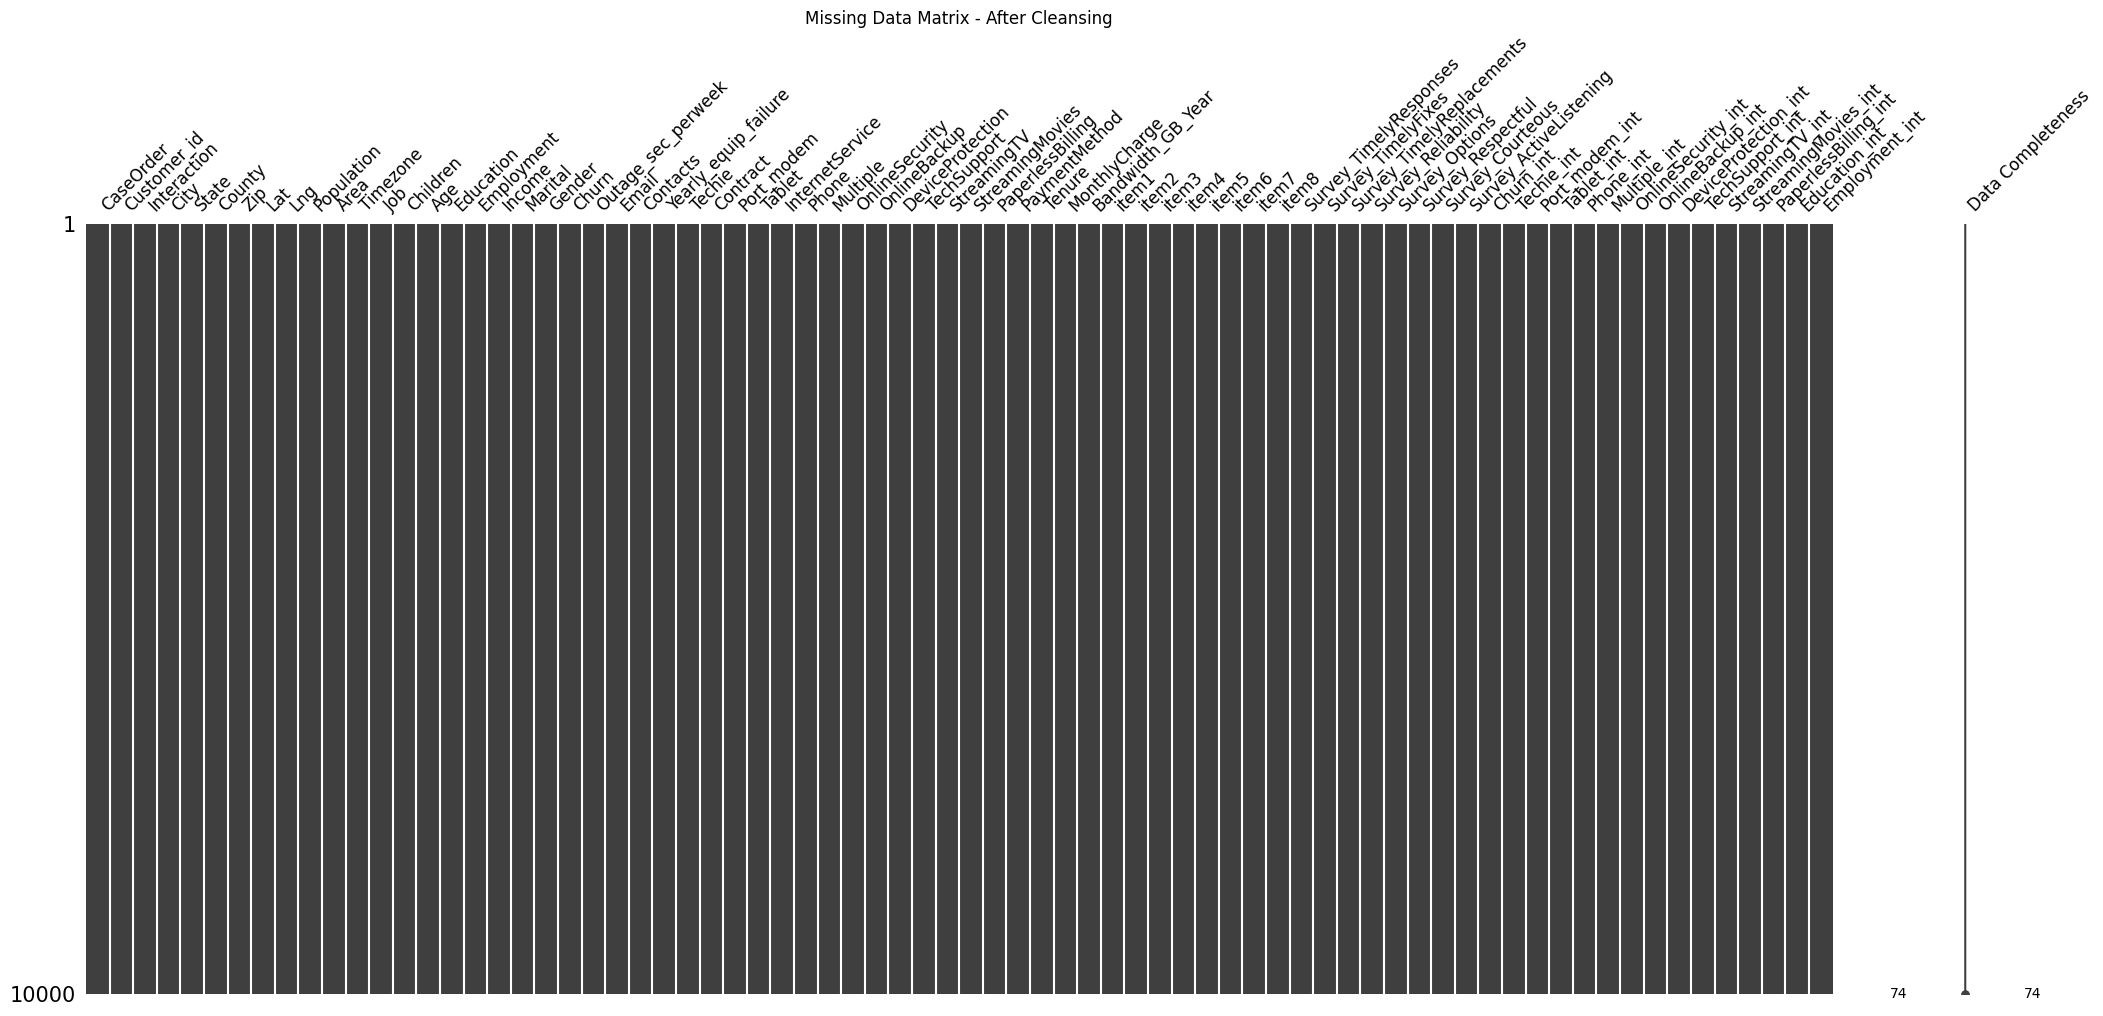

In [33]:
#Check once again that no data are missing [In-Text Citation: (Uzunov, 2016)]
print(raw_data[raw_data.columns[raw_data.isnull().any()]].isnull().sum())
msno.matrix(raw_data, fontsize = 12, labels=True)
plt.title('Missing Data Matrix - After Cleansing')
plt.show()

### Evaluate outliers treated

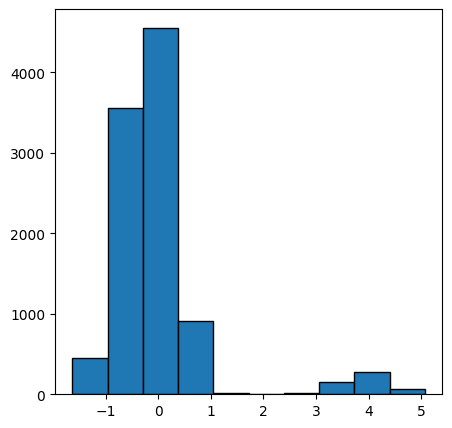

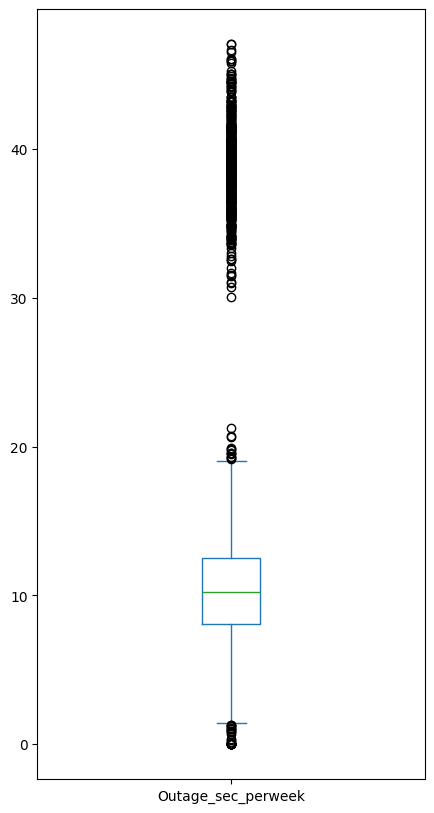

In [34]:
#Update zscore for Outage_sec_perweek and plot [In-Text Citation:(Bathelt, 2017)]
raw_data_z['Outage_sec_perweek'] = (raw_data['Outage_sec_perweek'] - raw_data['Outage_sec_perweek'].mean())/raw_data['Outage_sec_perweek'].std()
raw_data_z['Outage_sec_perweek'].hist(edgecolor='black', grid=False, figsize=(5,5))
plt.show()
#Check boxplot of Outage_sec_perweek after treatment
raw_data['Outage_sec_perweek'].plot(kind='box', figsize=(5, 10))
plt.show()

### Verify re-expression of Yes/No variables

In [35]:
raw_data[yes_no_int_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Churn_int             10000 non-null  int64
 1   Techie_int            10000 non-null  int64
 2   Port_modem_int        10000 non-null  int64
 3   Tablet_int            10000 non-null  int64
 4   Phone_int             10000 non-null  int64
 5   Multiple_int          10000 non-null  int64
 6   OnlineSecurity_int    10000 non-null  int64
 7   OnlineBackup_int      10000 non-null  int64
 8   DeviceProtection_int  10000 non-null  int64
 9   TechSupport_int       10000 non-null  int64
 10  StreamingTV_int       10000 non-null  int64
 11  StreamingMovies_int   10000 non-null  int64
 12  PaperlessBilling_int  10000 non-null  int64
dtypes: int64(13)
memory usage: 1015.8 KB


## Export Clean Data (D5)

In [36]:
#Write cleaned data to CSV
raw_data.to_csv('churn_clean_data.csv')

## Principal Component Analysis (E)

In [37]:
#Standardize numeric variables in preparation for PCA [In-Text Citation:(Middleton, Getting Started with Principal Component Analysis (PCA), 2023)]
normalized_data = (raw_data[numerical_variables] - raw_data[numerical_variables].mean()) / raw_data[numerical_variables].std()

In [38]:
#Fit the model [In-Text Citation:(Middleton, Getting Started with Principal Component Analysis (PCA), 2023)]
pca = PCA(n_components=normalized_data.shape[1])
pca.fit(normalized_data)
col_names = []
for i in range(normalized_data.shape[1]):
    col_names.append('PC' + str(i+1))
pca_data = pd.DataFrame(pca.transform(normalized_data),columns=col_names)

In [39]:
#Examine the loadings [In-Text Citation:(Middleton, Getting Started with Principal Component Analysis (PCA), 2023)]
loadings_data = pd.DataFrame(pca.components_.T, columns=col_names, index=raw_data[numerical_variables].columns)
loadings_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Age,-0.012380,-0.047346,-0.462197,0.441230,-0.092627,0.429082,-0.504067,-0.356839,0.121335,0.021552
Income,0.006196,-0.006591,0.232681,0.306368,0.790237,0.211687,-0.192125,0.375348,-0.069506,0.001167
Children,-0.001879,0.017635,0.587184,-0.072966,0.057459,0.498470,0.227574,-0.587861,0.009695,-0.018397
Tenure,0.704917,-0.058011,-0.018841,-0.011045,-0.003719,0.015694,-0.016664,0.007748,0.038156,-0.705122
Bandwidth_GB_Year,0.706839,-0.009236,0.004624,-0.017922,0.001164,0.008043,0.004107,-0.009499,-0.012675,0.706836
Outage_sec_perweek,0.022535,0.707244,0.042371,0.026858,0.018518,-0.011445,0.021988,0.072282,0.700428,0.000614
Email,-0.021286,0.065941,-0.234674,-0.592281,-0.069137,0.658569,-0.020440,0.383825,-0.055374,0.005569
Contacts,0.004536,-0.004906,-0.495040,0.231550,0.251028,0.132169,0.783465,-0.083286,0.005402,-0.002982
Yearly_equip_failure,0.015832,0.054784,0.277052,0.547830,-0.542672,0.261623,0.192000,0.451426,-0.127582,-0.002459
MonthlyCharge,0.045209,0.697414,-0.091558,0.020897,0.031586,-0.050345,-0.073057,-0.150933,-0.684664,-0.048329


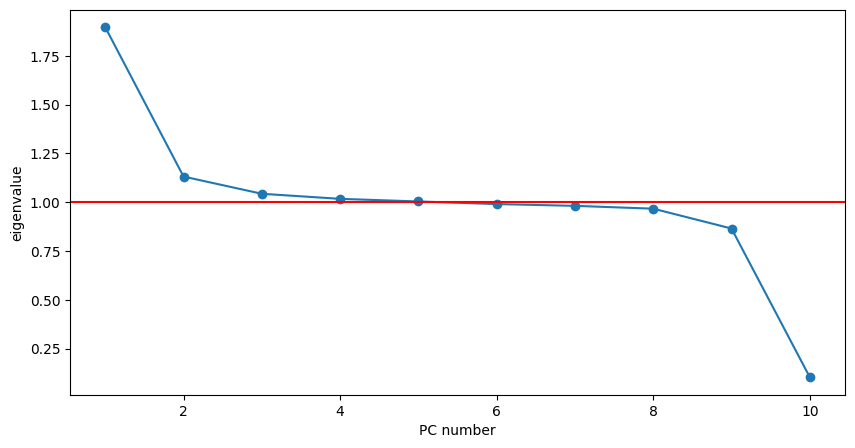

In [40]:
#Calculate and plot eigenvalues [In-Text Citation:(Middleton, Getting Started with Principal Component Analysis (PCA), 2023)]
cov_matrix = np.dot(normalized_data.T, normalized_data) / raw_data[numerical_variables].shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
fig = plt.figure(figsize=(10,5))
plt.plot(np.arange(1,len(eigenvalues)+1),eigenvalues, marker='o')
plt.xlabel('PC number')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color="red")
plt.show()